Data preprocessing

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('/home/kikikita/Рабочий стол/CS_GO_test/data/train.csv')
train

,map_id,team1_id,team2_id,map_name,who_win
0,289,6665,7718,Ancient,0
1,715,4411,10577,Inferno,0
2,157,11251,9455,Nuke,1
3,524,4608,7532,Mirage,0
4,404,8637,6667,Overpass,1
...,...,...,...,...,...
708,709,6667,4773,Inferno,0
709,528,9215,5995,Ancient,1
710,163,4869,9565,Mirage,1
711,96,10426,4991,Nuke,1


In [3]:
players_feats = pd.read_csv('/home/kikikita/Рабочий стол/CS_GO_test/data/players_feats.csv')
players_feats

,p1_id,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,...,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds,team_id,map_name,map_id
0,4954,90,42.2,112,0.80,76.3,5.9,6,156,0.58,...,5,25,12,2.08,1.28,84.0,25.0,6665,Ancient,635
1,5794,45,60.0,57,0.79,82.3,10.9,3,68,0.66,...,96,54,34,1.59,1.17,70.4,16.7,7532,Ancient,635
2,4954,156,51.9,167,0.93,63.5,3.4,10,265,0.59,...,22,26,19,1.37,1.10,88.5,20.5,6665,Dust2,583
3,5794,449,53.5,427,1.05,86.7,13.1,23,618,0.73,...,104,62,49,1.27,1.10,79.0,17.4,7532,Dust2,583
4,7998,173,32.9,130,1.33,82.4,2.9,9,225,0.77,...,19,27,25,1.08,1.08,81.5,16.2,4608,Dust2,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481,9031,69,49.3,70,0.99,69.8,5.7,4,114,0.61,...,-1,16,18,0.89,1.11,75.0,21.4,10503,Ancient,284
1482,7716,104,55.8,113,0.92,71.6,5.9,6,172,0.60,...,4,33,34,0.97,1.30,75.8,28.4,7020,Vertigo,27
1483,12521,141,37.6,159,0.89,79.7,7.4,8,210,0.67,...,5,9,15,0.60,0.77,55.6,4.3,8297,Vertigo,27
1484,7716,155,58.7,154,1.01,71.1,7.9,10,246,0.63,...,35,30,17,1.76,1.39,83.3,22.9,7020,Ancient,237


In [4]:
team1_feats = train.merge(players_feats, how='left', left_on=['team1_id', 'map_id'], right_on=['team_id', 'map_id'])\
    .drop(['p1_id', 'p2_id', 'p3_id', 'p4_id', 'p5_id', 'team_id', 'map_name_y'], axis=1)
team1_feats.head()

,map_id,team1_id,team2_id,map_name_x,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds
0,289,6665,7718,Ancient,0,258,36.0,293,0.88,71.1,...,1.21,0.74,210,55,55,33,1.67,1.18,83.6,19.7
1,715,4411,10577,Inferno,0,178,39.3,208,0.86,64.1,...,0.92,0.61,186,-23,47,49,0.96,1.01,74.5,16.3
2,157,11251,9455,Nuke,1,494,52.8,397,1.24,94.0,...,1.04,0.64,150,8,11,21,0.52,0.73,81.8,5.0
3,524,4608,7532,Mirage,0,474,29.1,304,1.56,86.9,...,1.20,0.75,261,66,74,57,1.30,1.18,81.1,20.3
4,404,8637,6667,Overpass,1,217,55.8,248,0.88,64.8,...,1.10,0.73,78,11,20,17,1.18,1.09,80.0,17.0


In [5]:
team2_feats = train.merge(players_feats, how='left', left_on=['team2_id', 'map_id'], right_on=['team_id', 'map_id'])\
    .drop(['p1_id', 'p2_id', 'p3_id', 'p4_id', 'p5_id', 'team_id', 'map_name_y'], axis=1)
team2_feats.head()

,map_id,team1_id,team2_id,map_name_x,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill,p5_first_kill_in_won_rounds
0,289,6665,7718,Ancient,0,126,46.0,117,1.08,71.7,...,0.75,0.55,75,-34,21,20,1.05,1.06,76.2,19.0
1,715,4411,10577,Inferno,0,523,53.0,525,1.00,67.2,...,1.43,0.78,197,90,64,25,2.56,1.39,75.0,23.3
2,157,11251,9455,Nuke,1,201,39.8,215,0.93,69.0,...,0.81,0.55,101,-32,32,35,0.91,1.09,53.1,15.5
3,524,4608,7532,Mirage,0,366,53.6,359,1.02,85.4,...,0.92,0.54,109,-13,15,21,0.71,0.82,73.3,7.9
4,404,8637,6667,Overpass,1,184,50.0,189,0.97,73.9,...,1.17,0.72,122,26,20,10,2.00,1.01,80.0,12.4


In [6]:
teams_feats = team1_feats.iloc[:,5:-1] - team2_feats.iloc[:,5:-1]
teams_feats

,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,...,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
0,132,-10.0,176,-0.20,-0.6,1.5,10,271,-0.12,0.07,...,0.31,0.46,0.19,135,89,34,13,0.62,0.12,7.4
1,-345,-13.7,-317,-0.14,-3.1,3.7,-20,-516,-0.07,0.05,...,-0.23,-0.51,-0.17,-11,-113,-17,24,-1.60,-0.38,-0.5
2,293,13.0,182,0.31,25.0,1.3,9,259,0.23,0.02,...,-0.08,0.23,0.09,49,40,-21,-14,-0.39,-0.36,28.7
3,108,-24.5,-55,0.54,1.5,-4.1,1,33,0.16,-0.05,...,0.25,0.28,0.21,152,79,59,36,0.59,0.36,7.8
4,33,5.8,59,-0.09,-9.1,1.2,4,115,-0.12,0.03,...,-0.03,-0.07,0.01,-44,-15,0,7,-0.82,0.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,71,-5.2,134,-0.14,1.4,2.8,4,147,-0.03,-0.01,...,0.07,0.25,0.06,146,98,10,-6,0.75,-0.12,11.8
709,136,-9.5,54,0.68,24.5,1.9,5,122,0.29,-0.04,...,-0.29,0.84,0.69,27,-7,10,9,1.11,1.30,60.0
710,190,-5.1,232,-0.01,-6.1,2.2,14,385,-0.05,-0.01,...,0.26,0.28,0.16,189,107,53,30,0.43,0.19,1.7
711,236,-1.4,159,0.22,6.8,-2.2,10,241,0.14,-0.03,...,0.09,-0.03,-0.01,-121,-32,-12,-17,0.14,0.09,-6.9


In [7]:
train_feats = pd.concat([train, teams_feats], axis=1)
train_feats.head()

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,...,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
0,289,6665,7718,Ancient,0,132,-10.0,176,-0.20,-0.6,...,0.31,0.46,0.19,135,89,34,13,0.62,0.12,7.4
1,715,4411,10577,Inferno,0,-345,-13.7,-317,-0.14,-3.1,...,-0.23,-0.51,-0.17,-11,-113,-17,24,-1.60,-0.38,-0.5
2,157,11251,9455,Nuke,1,293,13.0,182,0.31,25.0,...,-0.08,0.23,0.09,49,40,-21,-14,-0.39,-0.36,28.7
3,524,4608,7532,Mirage,0,108,-24.5,-55,0.54,1.5,...,0.25,0.28,0.21,152,79,59,36,0.59,0.36,7.8
4,404,8637,6667,Overpass,1,33,5.8,59,-0.09,-9.1,...,-0.03,-0.07,0.01,-44,-15,0,7,-0.82,0.08,0.0


In [8]:
#смотрим пустые значения
missing_data = train_feats.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

map_id
False    713
Name: map_id, dtype: int64
 
team1_id
False    713
Name: team1_id, dtype: int64
 
team2_id
False    713
Name: team2_id, dtype: int64
 
map_name
False    713
Name: map_name, dtype: int64
 
who_win
False    713
Name: who_win, dtype: int64
 
p1_total_kills
False    713
Name: p1_total_kills, dtype: int64
 
p1_headshots
False    713
Name: p1_headshots, dtype: int64
 
p1_total_deaths
False    713
Name: p1_total_deaths, dtype: int64
 
p1_kd_ratio
False    713
Name: p1_kd_ratio, dtype: int64
 
p1_damage_per_round
False    713
Name: p1_damage_per_round, dtype: int64
 
p1_grenade_damage_per_round
False    713
Name: p1_grenade_damage_per_round, dtype: int64
 
p1_maps_played
False    713
Name: p1_maps_played, dtype: int64
 
p1_rounds_played
False    713
Name: p1_rounds_played, dtype: int64
 
p1_kills_per_round
False    713
Name: p1_kills_per_round, dtype: int64
 
p1_assists_per_round
False    713
Name: p1_assists_per_round, dtype: int64
 
p1_deaths_per_round
False    713
Name: 

In [9]:
train_feats = train_feats.fillna(0)

In [10]:
train_feats.to_csv('train_feats.csv', index=False)

Training model

In [11]:
import catboost

In [12]:
import pandas as pd
import numpy as np
import os
np.set_printoptions(precision=4)
import catboost
from catboost import *

In [13]:
X = train_feats.drop(['who_win','team1_id', 'team2_id', 'map_name'], axis=1).astype('string')
y = train_feats.who_win.astype('int64')

In [14]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [15]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 386, One count = 327


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [17]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [18]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 100
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.1

cv_data = cv(
    params = params, #параметры модели
    pool = Pool(X, label=y, cat_features=cat_features), #датасет на котором хотим обучаться
    fold_count=5, #число фолдов, на которые бьем датасет(сколько будет одновременных обучений)
    shuffle=True, #перемешивание датасета перед разбиением
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.680040686
bestIteration = 8

Training on fold [1/5]

bestTest = 0.6883913824
bestIteration = 8

Training on fold [2/5]

bestTest = 0.6811161476
bestIteration = 38

Training on fold [3/5]

bestTest = 0.6901104353
bestIteration = 3

Training on fold [4/5]

bestTest = 0.6648407924
bestIteration = 54



In [19]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.691177,0.001770,0.683979,0.002234,0.542727,0.045180
1,1,0.689904,0.001836,0.676665,0.002468,0.549705,0.019990
2,2,0.688577,0.002072,0.668821,0.003617,0.544184,0.026425
3,3,0.688924,0.001297,0.662429,0.003852,0.540068,0.032215
4,4,0.690884,0.002487,0.654164,0.005268,0.519172,0.037149


In [20]:
best_value = np.min(cv_data['test-Logloss-mean'])
best_iter = np.argmin(cv_data['test-Logloss-mean'])
#выводит значение лучшего Logloss + std на шаге
print('Best validation Logloss score, not stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Logloss-std'][best_iter],
    best_iter)
)

Best validation Logloss score, not stratified: 0.6878±0.0054 on step 8


In [21]:
model_with_early_stop = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20 #если на протяжении 20 итераций, ошибка не уменьшается - остановка обучения
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
print(model_with_early_stop.tree_count_)

1


In [23]:
model_with_early_stop = CatBoostClassifier(
    eval_metric='AUC', #метрика по которой происходит остановка обучения
    iterations=100,
    random_seed=63,
    learning_rate=0.1,
    early_stopping_rounds=20
)
model_with_early_stop.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [24]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [25]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics

eval_pool = Pool(X_validation, y_validation, cat_features=cat_features)
curve = get_roc_curve(model, eval_pool) #возвращает ROC кривую
(fpr, tpr, thresholds) = curve
roc_auc = sklearn.metrics.auc(fpr, tpr)

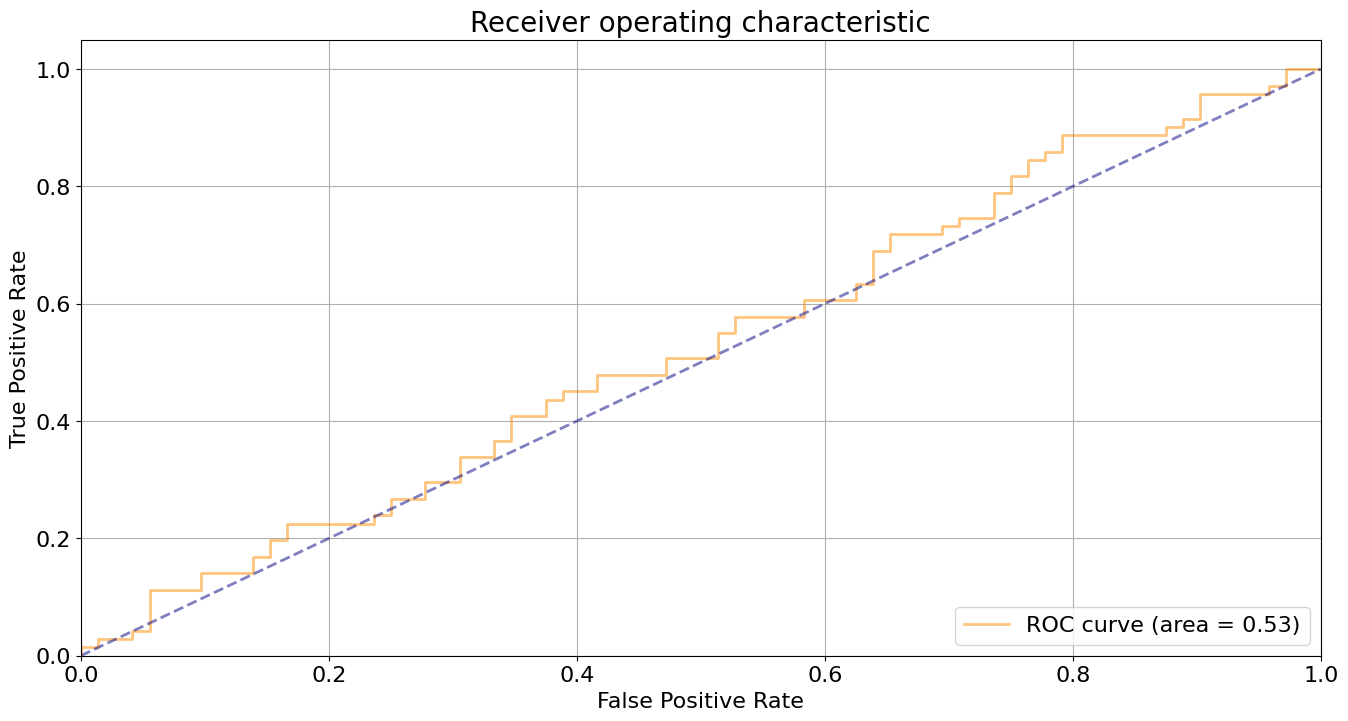

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic', fontsize=20)
plt.legend(loc="lower right", fontsize=16)
plt.show()


In [27]:
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

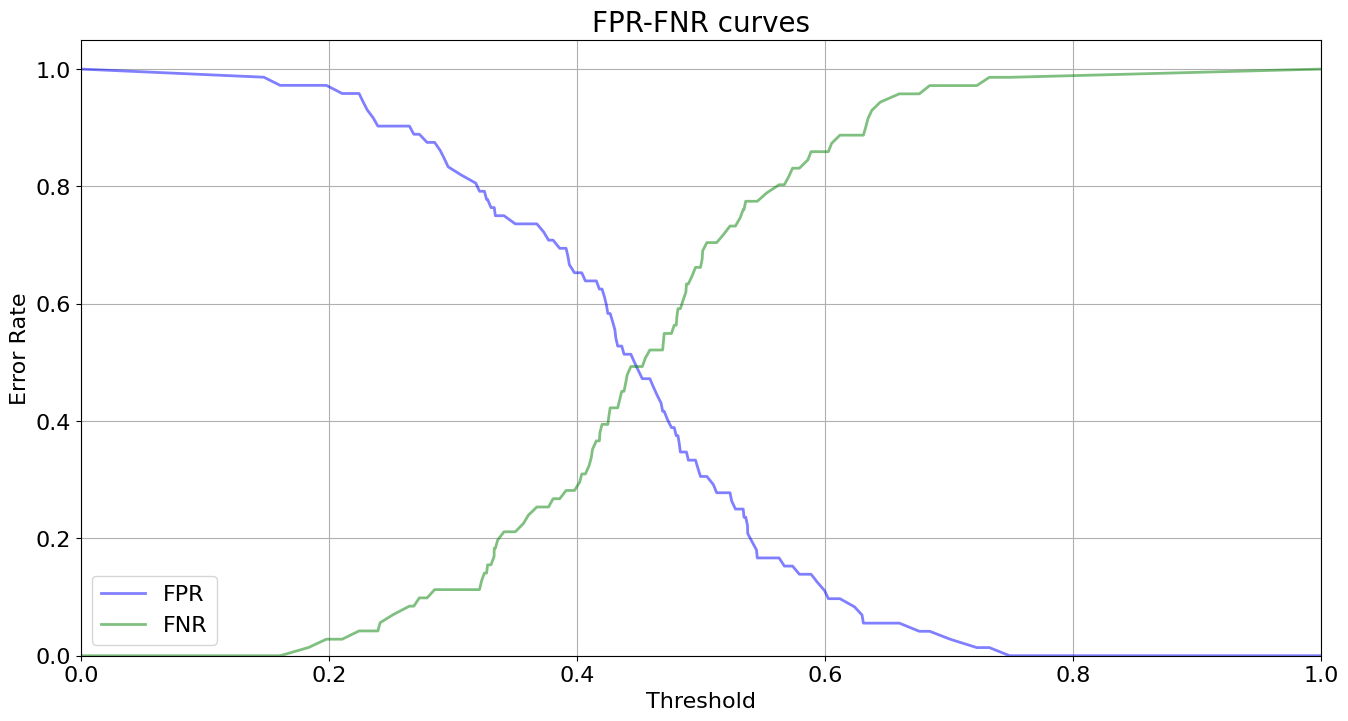

In [28]:
plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [29]:
from catboost.utils import select_threshold

print(select_threshold(model=model, data=eval_pool, FNR=0.01)) #хотим ошибаться в 1% объектов положительного класса
print(select_threshold(model=model, data=eval_pool, FPR=0.01)) #хотим меньше ошибаться в определении объектов отрицательного класса

0.1607929822673021
0.749088227398929


In [30]:
print(model.predict_proba(X=X_validation))

[[0.4864 0.5136]
 [0.737  0.263 ]
 [0.2372 0.7628]
 [0.5051 0.4949]
 [0.4117 0.5883]
 [0.5769 0.4231]
 [0.5735 0.4265]
 [0.6445 0.3555]
 [0.7052 0.2948]
 [0.4014 0.5986]
 [0.6732 0.3268]
 [0.8548 0.1452]
 [0.6668 0.3332]
 [0.5818 0.4182]
 [0.4762 0.5238]
 [0.5244 0.4756]
 [0.5124 0.4876]
 [0.5307 0.4693]
 [0.5189 0.4811]
 [0.4554 0.5446]
 [0.2646 0.7354]
 [0.5809 0.4191]
 [0.5973 0.4027]
 [0.62   0.38  ]
 [0.488  0.512 ]
 [0.6627 0.3373]
 [0.6255 0.3745]
 [0.5296 0.4704]
 [0.5086 0.4914]
 [0.4917 0.5083]
 [0.3656 0.6344]
 [0.7784 0.2216]
 [0.6057 0.3943]
 [0.5199 0.4801]
 [0.7585 0.2415]
 [0.3288 0.6712]
 [0.6788 0.3212]
 [0.4399 0.5601]
 [0.4314 0.5686]
 [0.5696 0.4304]
 [0.27   0.73  ]
 [0.3682 0.6318]
 [0.5375 0.4625]
 [0.5167 0.4833]
 [0.5747 0.4253]
 [0.5012 0.4988]
 [0.5229 0.4771]
 [0.4985 0.5015]
 [0.6079 0.3921]
 [0.8499 0.1501]
 [0.3695 0.6305]
 [0.7999 0.2001]
 [0.598  0.402 ]
 [0.804  0.196 ]
 [0.5295 0.4705]
 [0.5431 0.4569]
 [0.4652 0.5348]
 [0.4984 0.5016]
 [0.6063 0.393

In [31]:
print(model.predict(data=X_validation))

[1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1]


In [32]:
model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=50
)

0:	learn: 0.6857835	total: 6.01ms	remaining: 595ms
50:	learn: 0.4345628	total: 267ms	remaining: 256ms
99:	learn: 0.2790878	total: 550ms	remaining: 0us


In [33]:
metrics = model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [34]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,p5_saved_teammates_per_round,3.803263
1,p1_assists_per_round,3.785616
2,p1_deaths_per_round,3.489788
3,p2_saved_teammates_per_round,2.840931
4,p3_total_opening_deaths,2.760220
...,...,...
115,p5_rounds_played,0.000000
116,p5_kills_per_round,0.000000
117,p5_opening_kill_ratio,0.000000
118,p5_opening_kill_rating,0.000000


In [35]:
from catboost import CatBoost
fast_model = CatBoostClassifier(
    random_seed=63,
    iterations=100,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy', 'F1'],
    boosting_type='Plain', #тип бустинга
    bootstrap_type='Bernoulli', #тип сэмплирования
    subsample=0.5, #процент объектов, которые будут использоваться при построении дерева
    one_hot_max_size=20, 
    rsm=0.5,
    leaf_estimation_iterations=5, #5 раз считаем значения одного и того же дерева в листьях
    max_ctr_complexity=1) #комбинации фичей
    
fast_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [36]:
tunned_model = CatBoostClassifier(
    random_seed=63,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg=3,
    bagging_temperature=1,
    random_strength=1,
    one_hot_max_size=2,
    leaf_estimation_method='Newton'
)
tunned_model.fit(
    X_train, y_train,
    cat_features=cat_features,
    verbose=False,
    eval_set=(X_validation, y_validation),
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [37]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(tunned_model.tree_count_ * 1.2),
)
best_model.fit(
    X, y,
    cat_features=cat_features,
    verbose=100
)

Learning rate set to 0.446893
0:	learn: 0.6721942	total: 7.48ms	remaining: 97.3ms
13:	learn: 0.4790270	total: 95.8ms	remaining: 0us


In [38]:
metrics = best_model.eval_metrics(
    data=Pool(X, label=y, cat_features=cat_features),
    metrics=['Logloss','AUC', 'F1', 'Accuracy'],
    ntree_start=0,
    ntree_end=0,
    eval_period=1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [39]:
X_test = X_validation#.drop('y', axis=1).astype("string")
test_pool = Pool(data=X_test, cat_features=cat_features)
predictions = best_model.predict_proba(test_pool)
print('Predictoins:')
print(predictions)

Predictoins:
[[0.5562 0.4438]
 [0.3456 0.6544]
 [0.2942 0.7058]
 [0.3491 0.6509]
 [0.3286 0.6714]
 [0.4601 0.5399]
 [0.6283 0.3717]
 [0.3792 0.6208]
 [0.6155 0.3845]
 [0.6255 0.3745]
 [0.7721 0.2279]
 [0.5853 0.4147]
 [0.3943 0.6057]
 [0.7047 0.2953]
 [0.4857 0.5143]
 [0.5196 0.4804]
 [0.4113 0.5887]
 [0.3665 0.6335]
 [0.3793 0.6207]
 [0.756  0.244 ]
 [0.3038 0.6962]
 [0.4369 0.5631]
 [0.3468 0.6532]
 [0.6002 0.3998]
 [0.5984 0.4016]
 [0.1995 0.8005]
 [0.6085 0.3915]
 [0.5164 0.4836]
 [0.3292 0.6708]
 [0.3855 0.6145]
 [0.4771 0.5229]
 [0.4829 0.5171]
 [0.6222 0.3778]
 [0.8439 0.1561]
 [0.4572 0.5428]
 [0.7445 0.2555]
 [0.5464 0.4536]
 [0.6778 0.3222]
 [0.6661 0.3339]
 [0.3926 0.6074]
 [0.231  0.769 ]
 [0.4296 0.5704]
 [0.7085 0.2915]
 [0.5577 0.4423]
 [0.5979 0.4021]
 [0.3525 0.6475]
 [0.4352 0.5648]
 [0.3204 0.6796]
 [0.8821 0.1179]
 [0.67   0.33  ]
 [0.4502 0.5498]
 [0.5727 0.4273]
 [0.4215 0.5785]
 [0.8121 0.1879]
 [0.6677 0.3323]
 [0.3246 0.6754]
 [0.3012 0.6988]
 [0.4862 0.5138]
 

In [40]:
y_true = y_validation#pd.DataFrame(test_df.y)
y_pred = best_model.predict(test_pool)

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print(accuracy_score(y_true, y_pred))
print(f1_score(y_true, y_pred))
print(precision_score(y_true, y_pred))
print(recall_score(y_true, y_pred))

0.6643356643356644
0.6571428571428573
0.6666666666666666
0.647887323943662


In [42]:
my_best_model = best_model
my_best_model.save_model('catboost_model.bin')
my_best_model.save_model('catboost_model.json', format='json')

In [43]:
my_best_model.load_model('catboost_model.bin')
print(my_best_model.get_params())
print(my_best_model.random_seed_)

{'iterations': 14, 'random_seed': 63, 'loss_function': 'Logloss', 'verbose': 100}
63


H2O AUTOML

In [44]:
#!apt-get install default-jre
#!java -version

In [45]:
import h2o

In [46]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 30 mins
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_kikikita_jyjmbp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.769 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [47]:
from h2o.automl import H2OAutoML

In [48]:
train_df = h2o.H2OFrame(train_feats)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
train_df.describe()

Rows:713
Cols:124

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
type,int,int,int,enum,int,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real
mins,0.0,4411.0,4411.0,,0.0,-730.0,-51.6,-711.0,-2.78,-91.1,-13.3,-41.0,-1097.0,-0.97,-0.19,-0.74,-0.12,-0.14,-1.41,-2.8,-0.98,-372.0,-238.0,-108.0,-82.0,-19.14,-1.33,-100.0,-37.3,-698.0,-57.9,-660.0,-1.62,-84.5,-15.4,-36.0,-975.0,-0.77,-0.21999999999999997,-0.7,-0.16,-0.16,-1.17,-1.62,-0.85,-338.0,-150.0,-103.0,-106.0,-7.91,-1.36,-87.5,-25.5,-648.0,-60.5,-642.0,-1.64,-90.0,-9.6,-35.0,-947.0,-0.82,-0.15,-0.65,-0.11,-0.15,-1.33,-3.0,-0.9,-310.0,-140.0,-90.0,-93.0,-4.43,-1.32,-90.9,-23.8,-684.0,-55.0,-649.0,-1.72,-81.2,-13.8,-34.0,-921.0,-0.79,-0.17,-0.73,-0.17,-0.14,-1.31,-1.75,-1.05,-325.0,-167.0,-102.0,-114.0,-5.83,-1.83,-100.0,-31.2,-675.0,-54.1,-576.0,-1.17,-80.4,-16.7,-35.0,-913.0,-0.74,-0.15,-0.68,-0.13,-0.18000000000000002,-1.15,-1.97,-0.95,-296.0,-156.0,-85.0,-76.0,-3.52,-1.5,-100.0
mean,370.92566619915823,7243.643758765781,7787.844319775595,,0.4586255259467041,9.214586255259468,-0.6809256661991582,

In [50]:
train_df['who_win'] = train_df['who_win'].asfactor()
train_df['map_id'] = train_df['map_id'].asfactor()
train_df['team1_id'] = train_df['team1_id'].asfactor()
train_df['team2_id'] = train_df['team2_id'].asfactor()
train_df['map_name'] = train_df['map_name'].asfactor()

In [51]:
train_df.describe()

Rows:713
Cols:124

,map_id,team1_id,team2_id,map_name,who_win,p1_total_kills,p1_headshots,p1_total_deaths,p1_kd_ratio,p1_damage_per_round,p1_grenade_damage_per_round,p1_maps_played,p1_rounds_played,p1_kills_per_round,p1_assists_per_round,p1_deaths_per_round,p1_saved_by_teammate_per_round,p1_saved_teammates_per_round,p1_rating,p1_kill_death,p1_kill_round,p1_rounds_with_kills,p1_kill_death_difference,p1_total_opening_kills,p1_total_opening_deaths,p1_opening_kill_ratio,p1_opening_kill_rating,p1_team_win_percent_after_first_kill,p1_first_kill_in_won_rounds,p2_total_kills,p2_headshots,p2_total_deaths,p2_kd_ratio,p2_damage_per_round,p2_grenade_damage_per_round,p2_maps_played,p2_rounds_played,p2_kills_per_round,p2_assists_per_round,p2_deaths_per_round,p2_saved_by_teammate_per_round,p2_saved_teammates_per_round,p2_rating,p2_kill_death,p2_kill_round,p2_rounds_with_kills,p2_kill_death_difference,p2_total_opening_kills,p2_total_opening_deaths,p2_opening_kill_ratio,p2_opening_kill_rating,p2_team_win_percent_after_first_kill,p2_first_kill_in_won_rounds,p3_total_kills,p3_headshots,p3_total_deaths,p3_kd_ratio,p3_damage_per_round,p3_grenade_damage_per_round,p3_maps_played,p3_rounds_played,p3_kills_per_round,p3_assists_per_round,p3_deaths_per_round,p3_saved_by_teammate_per_round,p3_saved_teammates_per_round,p3_rating,p3_kill_death,p3_kill_round,p3_rounds_with_kills,p3_kill_death_difference,p3_total_opening_kills,p3_total_opening_deaths,p3_opening_kill_ratio,p3_opening_kill_rating,p3_team_win_percent_after_first_kill,p3_first_kill_in_won_rounds,p4_total_kills,p4_headshots,p4_total_deaths,p4_kd_ratio,p4_damage_per_round,p4_grenade_damage_per_round,p4_maps_played,p4_rounds_played,p4_kills_per_round,p4_assists_per_round,p4_deaths_per_round,p4_saved_by_teammate_per_round,p4_saved_teammates_per_round,p4_rating,p4_kill_death,p4_kill_round,p4_rounds_with_kills,p4_kill_death_difference,p4_total_opening_kills,p4_total_opening_deaths,p4_opening_kill_ratio,p4_opening_kill_rating,p4_team_win_percent_after_first_kill,p4_first_kill_in_won_rounds,p5_total_kills,p5_headshots,p5_total_deaths,p5_kd_ratio,p5_damage_per_round,p5_grenade_damage_per_round,p5_maps_played,p5_rounds_played,p5_kills_per_round,p5_assists_per_round,p5_deaths_per_round,p5_saved_by_teammate_per_round,p5_saved_teammates_per_round,p5_rating,p5_kill_death,p5_kill_round,p5_rounds_with_kills,p5_kill_death_difference,p5_total_opening_kills,p5_total_opening_deaths,p5_opening_kill_ratio,p5_opening_kill_rating,p5_team_win_percent_after_first_kill
type,enum,enum,enum,enum,enum,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real,real,int,real,int,real,real,real,int,int,real,real,real,real,real,real,real,real,int,int,int,int,real,real,real
mins,,,,,,-730.0,-51.6,-711.0,-2.78,-91.1,-13.3,-41.0,-1097.0,-0.97,-0.19,-0.74,-0.12,-0.14,-1.41,-2.8,-0.98,-372.0,-238.0,-108.0,-82.0,-19.14,-1.33,-100.0,-37.3,-698.0,-57.9,-660.0,-1.62,-84.5,-15.4,-36.0,-975.0,-0.77,-0.21999999999999997,-0.7,-0.16,-0.16,-1.17,-1.62,-0.85,-338.0,-150.0,-103.0,-106.0,-7.91,-1.36,-87.5,-25.5,-648.0,-60.5,-642.0,-1.64,-90.0,-9.6,-35.0,-947.0,-0.82,-0.15,-0.65,-0.11,-0.15,-1.33,-3.0,-0.9,-310.0,-140.0,-90.0,-93.0,-4.43,-1.32,-90.9,-23.8,-684.0,-55.0,-649.0,-1.72,-81.2,-13.8,-34.0,-921.0,-0.79,-0.17,-0.73,-0.17,-0.14,-1.31,-1.75,-1.05,-325.0,-167.0,-102.0,-114.0,-5.83,-1.83,-100.0,-31.2,-675.0,-54.1,-576.0,-1.17,-80.4,-16.7,-35.0,-913.0,-0.74,-0.15,-0.68,-0.13,-0.18000000000000002,-1.15,-1.97,-0.95,-296.0,-156.0,-85.0,-76.0,-3.52,-1.5,-100.0
mean,,,,,,9.214586255259468,-0.6809256661991582,12.022440392706882,-0.0033520336605890617,-0.6886395511921458,-0.07180925666199155,0

In [52]:
feats_train,feats_test,feats_valid = train_df.split_frame(ratios=[.7, .15], seed = 1234)

In [53]:
y = "who_win"
x = train_df.columns
x.remove(y)
x.remove('team1_id')
x.remove('team2_id')
x.remove('map_name')

In [54]:
aml = H2OAutoML(max_models = 20, seed = 10, exclude_algos = ["StackedEnsemble"], nfolds=0)

In [55]:
aml.train(x = x, y = y, training_frame = feats_train, validation_frame=feats_valid)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_8_20221204_132758


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11469103097834372
RMSE: 0.3386606427950312
LogLoss: 0.38632661515886885
Mean Per-Class Error: 0.09736721611721612
AUC: 0.9507097069597069
AUCPR: 0.9429883175005371
Gini: 0.9014194139194138

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48952555656433105
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      246  27   0.0989   (27.0/273.0)
1      23   217  0.0958   (23.0/240.0)
Total  269  244  0.0975   (50.0/513.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.489526     0.896694  189
max f2                       0.447119     0.918033  204
max f0point5                 0.543531     0.901718  157
max accuracy                 0.494663     0.902534  187
max precision                0.972584     1         0
max recall                   0.197067     1         319
max specificity              0.972584     1         0
max absolute_mcc             0.489526     0.804554  189
max min_per_class_accuracy   0.489526     0.901099  189
max mean_per_class_accuracy  0.489526     0.902633  189
max tns                      0.972584     273       0
max fns                      0.972584     239       0
max fps                      0.0110538    273       399
max tps                      0.197067     240       319
max tnr                      0.972584     1         0
max fnr                      0.972584     0.995833  0
max fpr                      0.0110538    1         399
max tpr                      0.197067     1         319

Gains/Lift Table: Avg response rate: 46,78 %, avg score: 46,57 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0116959                   0.935261           2.1375     2.1375             1                0.948417   1                           0.948417            0.025           0.025                      113.75    113.75             0.025
2        0.0214425                   0.918446           2.1375     2.1375             1                0.924909   1                           0.937732            0.0208333       0.0458333                  113.75    113.75             0.0458333
3        0.0311891                   0.912251           2.1375     2.1375             1                0.915252   1                           0.930707            0.0208333       0.0666667                  113.75    113.75             0.0666667
4        0.0409357                   0.901756           2.1375     2.1375             1                0.907201   1                           0.92511             0.0208333       0.0875                     113.75    113.75             0.0875
5        0.0506823                   0.884664           1.71       2.05529            0.8              0.891365   0.961538                    0.918621            0.0166667       0.104167                   71        105.529            0.100504
6        0.101365                    0.82388            2.1375     2.09639            1                0.852349   0.980769                    0.885485            0.108333        0.2125                     113.75    109.639            0.208837
7        0.150097                    0.776664           2.1375     2.10974            1                0.7

In [56]:
lb = aml.leaderboard

In [57]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_1_AutoML_8_20221204_132758,0.649206,0.662478,0.489662,0.378571,0.484371,0.234615
DeepLearning_1_AutoML_8_20221204_132758,0.599683,0.683093,0.514276,0.45,0.496301,0.246315
DeepLearning_grid_2_AutoML_8_20221204_132758_model_1,0.58381,0.961704,0.494053,0.43254,0.544992,0.297016
XGBoost_grid_1_AutoML_8_20221204_132758_model_2,0.572698,0.743298,0.425044,0.416667,0.515588,0.265831
DeepLearning_grid_1_AutoML_8_20221204_132758_model_1,0.568889,1.13577,0.47027,0.44127,0.574346,0.329873
XGBoost_3_AutoML_8_20221204_132758,0.566667,0.787916,0.478593,0.468254,0.525719,0.276381
GLM_1_AutoML_8_20221204_132758,0.56127,0.655588,0.488643,0.442857,0.48314,0.233424
XGBoost_grid_1_AutoML_8_20221204_132758_model_3,0.559048,0.710765,0.402092,0.429365,0.507418,0.257473
XGBoost_grid_1_AutoML_8_20221204_132758_model_1,0.55873,0.713435,0.432732,0.428571,0.508086,0.258151
DeepLearning_grid_3_AutoML_8_20221204_132758_model_1,0.548571,0.920374,0.478758,0.435714,0.575916,0.331679


In [58]:
feats_pred=aml.leader.predict(feats_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [59]:
feats_pred

predict,p0,p1
1,0.329217,0.670783
1,0.434786,0.565214
1,0.238352,0.761648
1,0.696233,0.303767
1,0.734727,0.265273
1,0.416931,0.583069
1,0.808026,0.191974
1,0.413474,0.586526
1,0.319882,0.680118
1,0.114951,0.885049


In [60]:
aml.leader.model_performance(feats_test)

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.24404143592639213
RMSE: 0.4940055019191508
LogLoss: 0.6995699811390141
Mean Per-Class Error: 0.3289036544850498
AUC: 0.6533776301218162
AUCPR: 0.6848193373388611
Gini: 0.3067552602436323

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3594796359539032
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      27   16   0.3721   (16.0/43.0)
1      12   30   0.2857   (12.0/42.0)
Total  39   46   0.3294   (28.0/85.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.35948      0.681818  45
max f2                       0.0778789    0.833333  83
max f0point5                 0.35948      0.663717  45
max accuracy                 0.35948      0.670588  45
max precision                0.946379     1         0
max recall                   0.0778789    1         83
max specificity              0.946379     1         0
max absolute_mcc             0.35948      0.343335  45
max min_per_class_accuracy   0.396702     0.651163  42
max mean_per_class_accuracy  0.35948      0.671096  45
max tns                      0.946379     43        0
max fns                      0.946379     41        0
max fps                      0.0647087    43        84
max tps                      0.0778789    42        83
max tnr                      0.946379     1         0
max fnr                      0.946379     0.97619   0
max fpr                      0.0647087    1         84
max tpr                      0.0778789    1         83

Gains/Lift Table: Avg response rate: 49,41 %, avg score: 43,59 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0117647                   0.89527            2.02381   2.02381            1                0.946379  1                           0.946379            0.0238095       0.0238095                  102.381   102.381            0.0238095
2        0.0235294                   0.885205           2.02381   2.02381            1                0.885535  1                           0.915957            0.0238095       0.047619                   102.381   102.381            0.047619
3        0.0352941                   0.878406           2.02381   2.02381            1                0.885049  1                           0.905655            0.0238095       0.0714286                  102.381   102.381            0.0714286
4        0.0470588                   0.853389           2.02381   2.02381            1                0.872274  1                           0.897309            0.0238095       0.0952381                  102.381   102.381            0.0952381
5        0.0588235                   0.810962           0         1.61905            0                0.819816  0.8                         0.881811            0               0.0952381                  -100      61.9048            0.0719823
6        0.105882                    0.741296           2.02381   1.79894            1                0.759718  0.888889                    0.827547            0.0952381       0.190476                   102.381   79.8942            0.16722
7        0.152941                    0.710594           1.0119    1.55678            0.5              0.727238  0.769231                    0.796683            0.047619        0.238095                   1.19048   55.6777            0.168328
8        0.2                         0.687559           1.0119    1

In [61]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [62]:
model_ids

['XGBoost_1_AutoML_8_20221204_132758',
 'DeepLearning_1_AutoML_8_20221204_132758',
 'DeepLearning_grid_2_AutoML_8_20221204_132758_model_1',
 'XGBoost_grid_1_AutoML_8_20221204_132758_model_2',
 'DeepLearning_grid_1_AutoML_8_20221204_132758_model_1',
 'XGBoost_3_AutoML_8_20221204_132758',
 'GLM_1_AutoML_8_20221204_132758',
 'XGBoost_grid_1_AutoML_8_20221204_132758_model_3',
 'XGBoost_grid_1_AutoML_8_20221204_132758_model_1',
 'DeepLearning_grid_3_AutoML_8_20221204_132758_model_1',
 'XRT_1_AutoML_8_20221204_132758',
 'GBM_4_AutoML_8_20221204_132758',
 'GBM_5_AutoML_8_20221204_132758',
 'GBM_3_AutoML_8_20221204_132758',
 'GBM_grid_1_AutoML_8_20221204_132758_model_1',
 'DRF_1_AutoML_8_20221204_132758',
 'XGBoost_2_AutoML_8_20221204_132758',
 'GBM_2_AutoML_8_20221204_132758',
 'GBM_1_AutoML_8_20221204_132758',
 'GBM_grid_1_AutoML_8_20221204_132758_model_2']

In [63]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_8_20221204_132758


Model Summary: 
    number_of_trees
--  -----------------
    30

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11469103097834372
RMSE: 0.3386606427950312
LogLoss: 0.38632661515886885
Mean Per-Class Error: 0.09736721611721612
AUC: 0.9507097069597069
AUCPR: 0.9429883175005371
Gini: 0.9014194139194138

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48952555656433105
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      246  27   0.0989   (27.0/273.0)
1      23   217  0.0958   (23.0/240.0)
Total  269  244  0.0975   (50.0/513.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.489526     0.896694  189
max f2                       0.447119     0.918033  204
max f0point5                 0.543531     0.901718  157
max accuracy                 0.494663     0.902534  187
max precision                0.972584     1         0
max recall                   0.197067     1         319
max specificity              0.972584     1         0
max absolute_mcc             0.489526     0.804554  189
max min_per_class_accuracy   0.489526     0.901099  189
max mean_per_class_accuracy  0.489526     0.902633  189
max tns                      0.972584     273       0
max fns                      0.972584     239       0
max fps                      0.0110538    273       399
max tps                      0.197067     240       319
max tnr                      0.972584     1         0
max fnr                      0.972584     0.995833  0
max fpr                      0.0110538    1         399
max tpr                      0.197067     1         319

Gains/Lift Table: Avg response rate: 46,78 %, avg score: 46,57 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0116959                   0.935261           2.1375     2.1375             1                0.948417   1                           0.948417            0.025           0.025                      113.75    113.75             0.025
2        0.0214425                   0.918446           2.1375     2.1375             1                0.924909   1                           0.937732            0.0208333       0.0458333                  113.75    113.75             0.0458333
3        0.0311891                   0.912251           2.1375     2.1375             1                0.915252   1                           0.930707            0.0208333       0.0666667                  113.75    113.75             0.0666667
4        0.0409357                   0.901756           2.1375     2.1375             1                0.907201   1                           0.92511             0.0208333       0.0875                     113.75    113.75             0.0875
5        0.0506823                   0.884664           1.71       2.05529            0.8              0.891365   0.961538                    0.918621            0.0166667       0.104167                   71        105.529            0.100504
6        0.101365                    0.82388            2.1375     2.09639            1                0.852349   0.980769                    0.885485            0.108333        0.2125                     113.75    109.639            0.208837
7        0.150097                    0.776664           2.1375     2.10974            1                0.7

In [64]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [65]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_1_AutoML_8_20221204_132758',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_1_AutoML_8_20221204_132758'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_8_20221204_132758_training_py_7_sid_95c4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_8_20221204_132758_training_py_7_sid_95c4'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_8_20221204_132758_training_py_7_sid_95c4',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_8_20221204_132758_training_py_7_sid_95c4'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [66]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 10.0,
  'nthread': 16,
  'seed': 10,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [67]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [69]:
out.confusion_matrix()

,0,1,Error,Rate
0,246.0,27.0,0.0989,(27.0/273.0)
1,23.0,217.0,0.0958,(23.0/240.0)
Total,269.0,244.0,0.0975,(50.0/513.0)


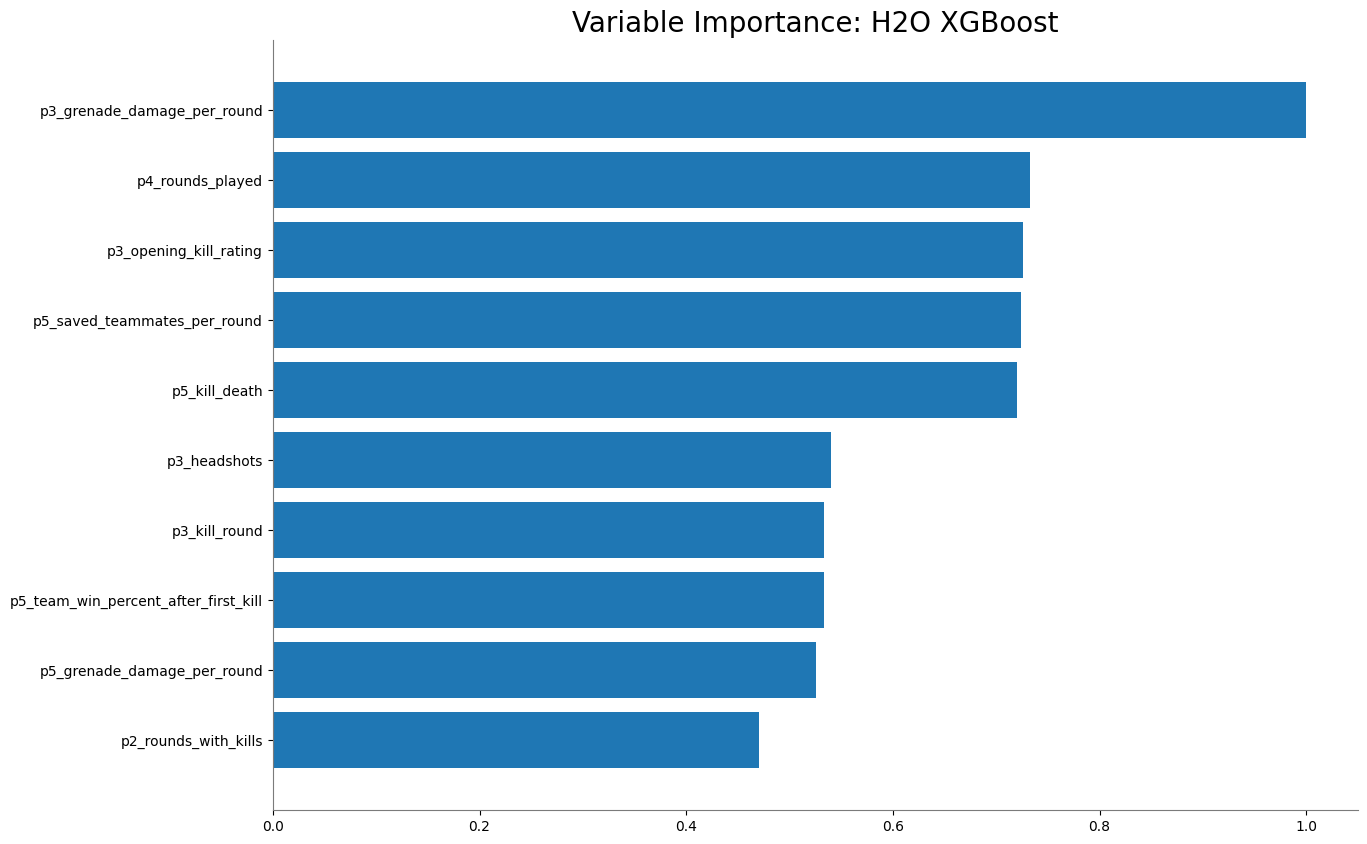

<Figure size 640x480 with 0 Axes>

In [70]:
out.varimp_plot()

In [71]:
aml.leader.download_mojo(path = "./")

'/home/kikikita/Рабочий стол/CS_GO_test/notebooks/XGBoost_1_AutoML_8_20221204_132758.zip'

LAMA AUTOML

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
import torch 

torch.set_num_threads(N_THREADS)



     
